**CHENNAI HOUSE PRICE PREDICTION**

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbuyer to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Objective:**

1)The model must be analysed to find the important factors that contribute towards the sales price.

2)It will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

**DATA PREPROCESSING**

**Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

**Reading the file and convert in to Dataframe**

In [2]:
from google.colab import files
files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


{'train-chennai-sale.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2

In [3]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**shape and summary of dataset:**

In [4]:
print("Number of data points in data:{0} and Number of features in data:{1}".format(df.shape[0],df.shape[1]))

Number of data points in data:7109 and Number of features in data:22


In [5]:
df.shape

(7109, 22)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**cheking for NULL values:**

In [8]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

copying the data set:

In [9]:
df1=df.copy()
df1

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


**Deleting the PRT_ID column which does not contain any information,which effect the sales price:**

In [10]:
df1=df1.drop(columns='PRT_ID')

**Statictics of Features:**

In [11]:
for i in df1.columns:
    print("Statistics for feature : {0}".format(i))
    print(df1[i].describe())
    print("----------------------------------------")

Statistics for feature : AREA
count         7109
unique          17
top       Chrompet
freq          1681
Name: AREA, dtype: object
----------------------------------------
Statistics for feature : INT_SQFT
count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64
----------------------------------------
Statistics for feature : DATE_SALE
count           7109
unique          2798
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object
----------------------------------------
Statistics for feature : DIST_MAINROAD
count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64
----------------------------------------
Statistics for feature : N_BEDROOM
count    7108.000000
mean        1.637029
s

**Visualization of NULL Values:**

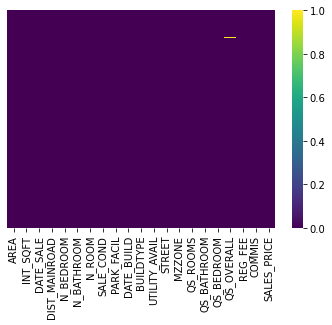

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

**Calculating Percentages of Missing Values:**

In [13]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>0]
for feature in features_with_na:
    print(feature, np.round(df1[feature].isnull().mean(), 4),  ' % missing values')

N_BEDROOM 0.0001  % missing values
N_BATHROOM 0.0007  % missing values
QS_OVERALL 0.0068  % missing values


Here, I checked the percentages of nan values present in each feature, then the listout the features which has missing values first and finally printed the feature name and the percentage of missing values upto 4 decimal values.

**Note:** Since the percentage of missing values is very very low. Therefore we can delete those vaues from the data set, because which will not affect much the target(sales price)

**Dropping the NULL Values:**

In [14]:
df1=df1.dropna(how='any',axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

**Droping duplicates if there:**

In [15]:
df1=df1.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

**Cross checking still any NULL values are present in data, by plotting NULL values of each feature with the help of heatmap plot.**

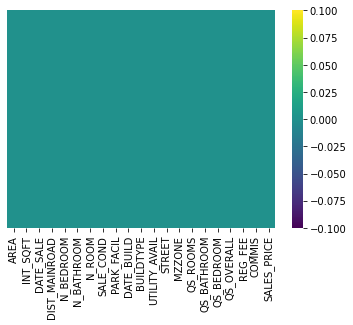

In [16]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

**Converting the data column features into datatime objects which are in object type:**

In [17]:
df1["DATE_SALE"] = pd.to_datetime(df1["DATE_SALE"])
df1['DATE_BUILD']=pd.to_datetime(df1["DATE_BUILD"])
df1['DATE_BUILD']

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7056, dtype: datetime64[ns]

**Considering Years from datatime for comparision purpose:**

In [18]:
df1['Yearsold']=df1['DATE_SALE'].dt.year
df1['Yearbuild']=df1['DATE_BUILD'].dt.year

**House life time Calculations:**

In [19]:
df1['Houselife']=df1['Yearsold']-df1['Yearbuild']

**Note:**Since the dates in the 'DATE_SALE' and 'DATE_BUILD' are not impact the target(sales price).Therefore dropping from the data to predict the target.

In [20]:
df1=df1.drop(columns=["DATE_SALE","DATE_BUILD"])

**EXPLORATORY DATA ANALYSIS (EDA)**

**Finding the wrong format entries in the categorical datatype features:** finding unique data types in each categorical features.

In [21]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes == 'O']
categorical_features=df1[categorical_features]
for feature in categorical_features:
  print('The feature is {} and number of categories are  = {}'.format(feature,(df1[feature].unique())))

The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
The feature is SALE_COND and number of categories are  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
The feature is PARK_FACIL and number of categories are  = ['Yes' 'No' 'Noo']
The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'Other' 'House' 'Comercial']
The feature is UTILITY_AVAIL and number of categories are  = ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']


**Replacing the wrong format entries and visualize of data distributed:**

**1.AREA feature wrong format values replacement and distribution count:**

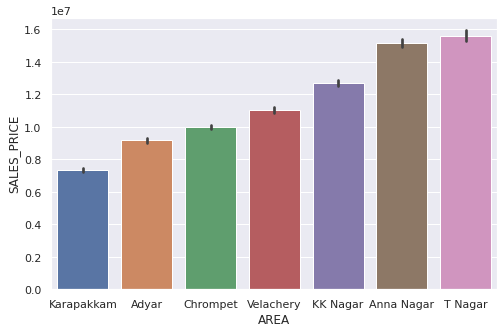

In [22]:
df1['AREA'] = df1['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='AREA',y="SALES_PRICE",data=df1,order=df1.groupby("AREA")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])

Here, AREA feature unique data type are ploted based on the mean of each data type(label) with respect to Sales Prices. T Nagar area is having more mean sales price compartively.

1.there is a relationship between area verus sales price==>area is important feature. 2.there is a linear relationship between area verus sales price==>we can do label encoding.

**2.Park facility wrong format values replacement and distribution count:**

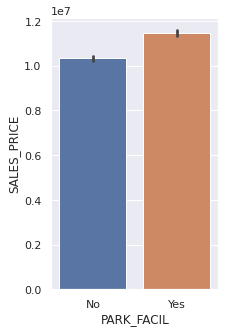

In [23]:
df1['PARK_FACIL'] = df1['PARK_FACIL'].replace('Noo','No')
sns.set(rc = {'figure.figsize':(3,5)})
sns.barplot(x='PARK_FACIL',y="SALES_PRICE",data=df1,order=df1.groupby("PARK_FACIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])

Here, PARKING facility feature unique data types are ploted based on the mean of each data type(label) with respect to Sales Prices. parking facility avalability (YES) is having more mean sales price compartively.

1.There is a relationship between Parking facility verus sales price==> Parking facility is important feature. 2.There is a linear relationship between Parking facility verus sales price==>we can do label encoding.

**3.Sale condition wrong format values replacement and distribution count**

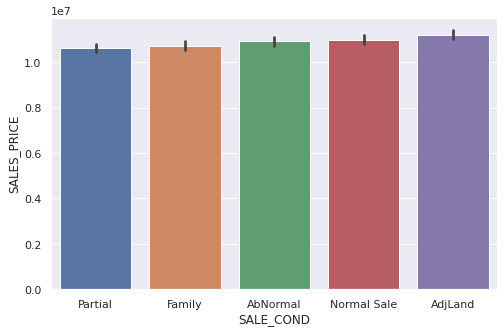

In [24]:
df1['SALE_COND'] = df1['SALE_COND'].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
sns.set_style(style='dark')

sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='SALE_COND',y="SALES_PRICE",data=df1,order=df1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

Here,Sales Condition feature unique data types are ploted based on the mean of each data type(label) with respect to Sales Prices. AdjLand label data is having more mean sales price compartively.

1.There is a relationship between Sales Condition verus sales price==> Sales condition is an important feature. 2.There is a linear relationship between Sales Condition verus sales price==>we can do label encoding.

**4.Buildtype wrong format values replacement and distribution count**

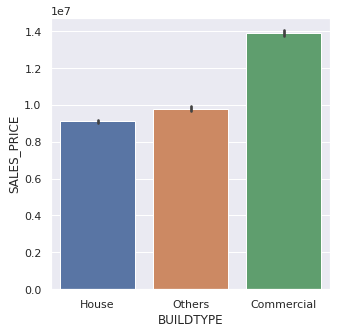

In [25]:
df1['BUILDTYPE'] = df1['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'])
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='BUILDTYPE',y="SALES_PRICE",data=df1,order=df1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

Here,BUILD TYPE feature unique data types are ploted based on the mean of each data type(label) with respect to Sales Prices. Commercial type data is having more mean sales price compartively.

1.There is a relationship between Buildtype verus sales price==> Bulid Type is an important feature. 2.There is a no linear relationship between Build Type verus sales price==>we can do one hot encoding.

**5.UTILITY_AVAIL wrong format values replacement and distribution count:**


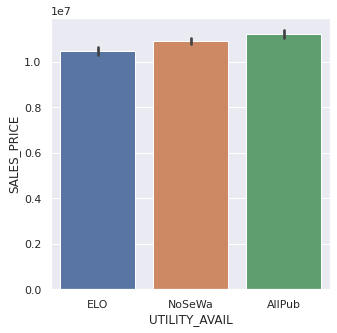

In [26]:
df1['UTILITY_AVAIL'] = df1['UTILITY_AVAIL'].replace(['All Pub','NoSewr ','NoSewr'],['AllPub','NoSeWa','NoSeWa'])
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE",data=df1,order=df1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

Here,Utlities Available feature unique data types are ploted based on the mean of each data type(label) with respect to Sales Prices. 'AllPub' data is having more mean sales price compartively.

1.There is a relationship between Utility_Avail verus sales price==> Utility_Avail is an important feature. 2.There is a linear relationship between Utility_Avail verus sales price==>we can do label encoding.

**6.STREET wrong format values replacement and distribution count:**

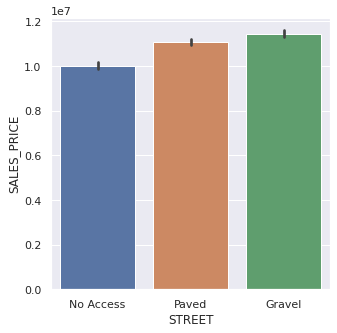

In [27]:
df1['STREET'] = df1['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='STREET',y="SALES_PRICE",data=df1,order=df1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

Here,STREET feature unique data types are ploted based on the mean of each data type(label) with respect to Sales Prices. Gravel Street is having more mean sales price compartively.

1.There is a relationship between STREET verus sales price==> STREET is an important feature. 2.There is a linear relationship between STREET verus sales price==>we can do label encoding.

**7.MZZONE Barplot vs sales price distribution count**

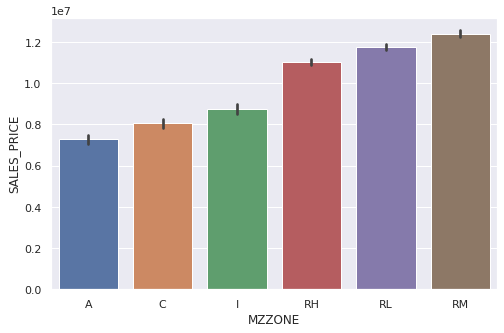

In [28]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='MZZONE',y="SALES_PRICE",data=df1,order=df1.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])

1.There is a relationship between MZZONE verus sales price==> MZZONE is important a feature. 2.There is a linear(approxmately) relationship between MZZONE verus sales price==>we can do label encoding/ one hot encoding.

**Features Outliers:**
finding outlier in the data if any:

In [29]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Yearsold',
       'Yearbuild', 'Houselife'],
      dtype='object')

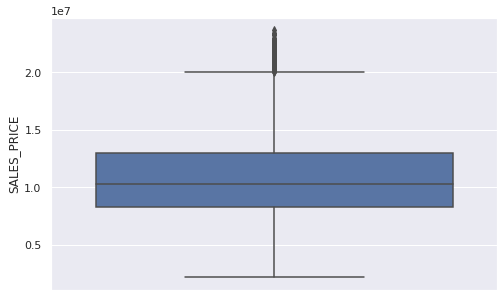

In [30]:
sns.boxplot(y=df1['SALES_PRICE'])

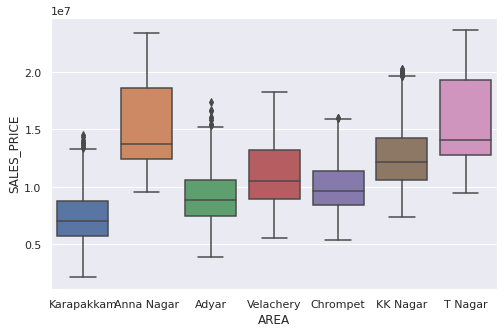

In [31]:
sns.boxplot(x=df1['AREA'],y=df1['SALES_PRICE'])

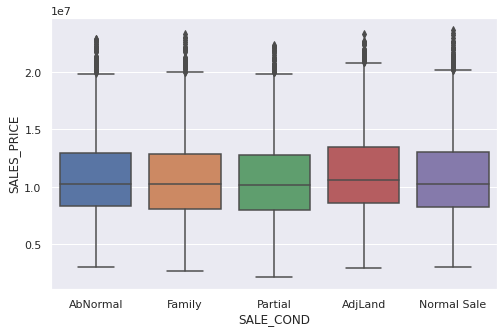

In [32]:
sns.boxplot(x=df1['SALE_COND'],y=df1['SALES_PRICE'])

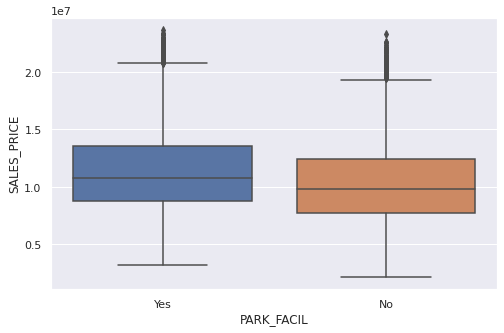

In [33]:
sns.boxplot(x=df1['PARK_FACIL'],y=df1['SALES_PRICE'])

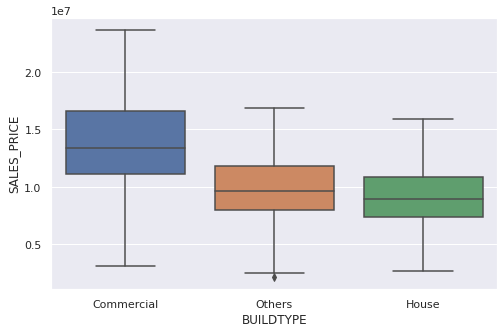

In [34]:
sns.boxplot(x=df1['BUILDTYPE'],y=df1['SALES_PRICE'])

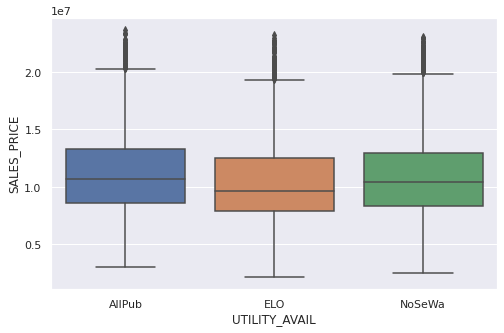

In [35]:
sns.boxplot(x=df1['UTILITY_AVAIL'],y=df1['SALES_PRICE'])

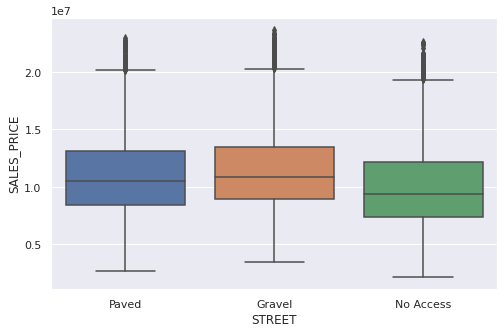

In [36]:
sns.boxplot(x=df1['STREET'],y=df1['SALES_PRICE'])

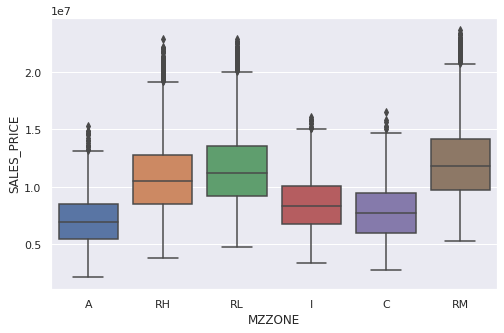

In [37]:
sns.boxplot(x=df1['MZZONE'],y=df1['SALES_PRICE'])

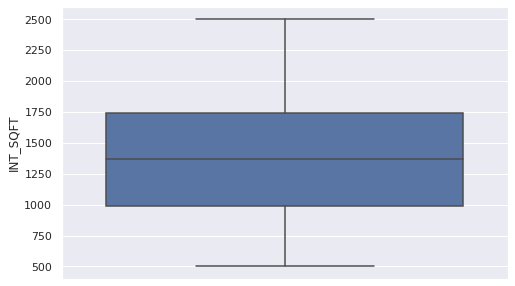

In [38]:
numerical=df[["INT_SQFT","SALES_PRICE","N_BEDROOM","N_ROOM","N_BATHROOM","DIST_MAINROAD"]]
sns.boxplot(y=df['INT_SQFT'])



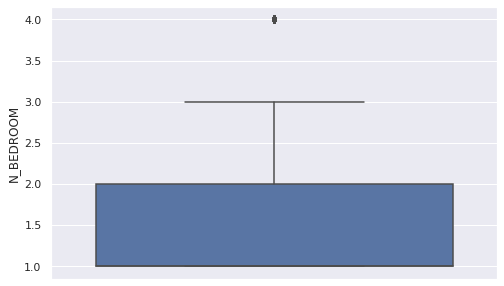

In [39]:
sns.boxplot(y=df['N_BEDROOM'])

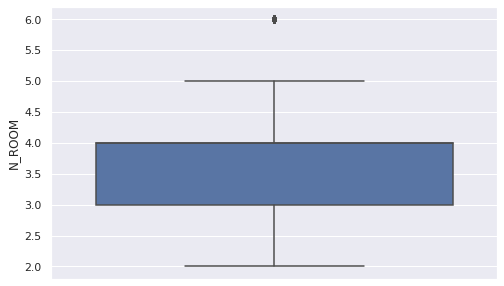

In [40]:
sns.boxplot(y=df['N_ROOM'])

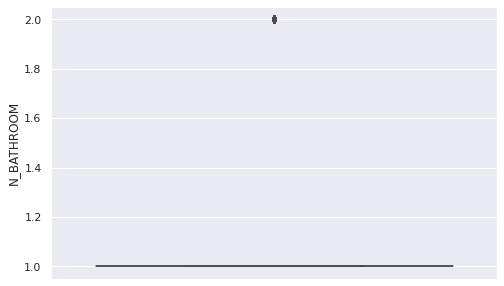

In [41]:
sns.boxplot(y=df['N_BATHROOM'])

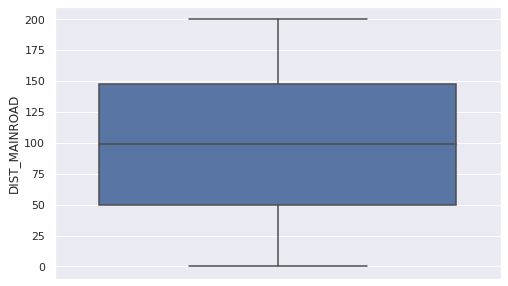

In [42]:
sns.boxplot(y=df['DIST_MAINROAD'])

**Observation:**
After plotting the boxplot of all features,the presence of outliers is negligible among all the features.

**GAUSSIAN DISTRIBUTION IN TARGET VARIABLE:**

Text(0.5, 1.0, 'Original Sale Price Histogram')

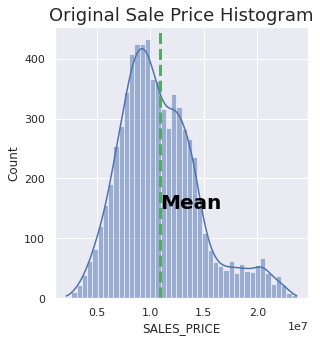

In [43]:
plt.figure(figsize = (10,5))
ax1 = plt.subplot(1,2,1)
sns.histplot(df1['SALES_PRICE'],palette='Blues_r',kde=True)
plt.axvline(x=df1['SALES_PRICE'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(df1['SALES_PRICE'].mean(), 150, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=18)

By plotting the Target variable(SALES_PRICE) as Histogram,the data is Right skewed(Positive skewed) and the mean also right of peak.

In [44]:
mean = df1['SALES_PRICE'].mean()
std = df1['SALES_PRICE'].std()
skew = df1['SALES_PRICE'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 10888008.2164, std: 3769081.2979, skew: 0.7755


Observation: The obtained skewness is 0.7755

**Correlation between the variables(finding linear relationships):**

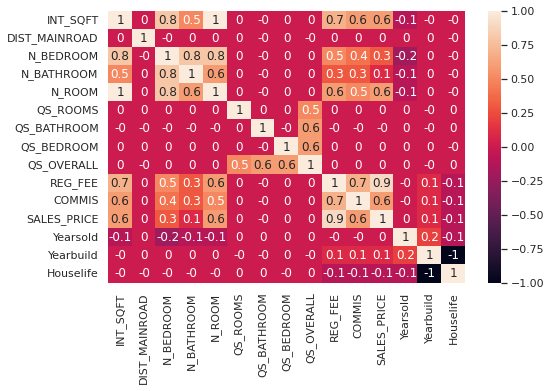

In [45]:
corr_matrix=df1.corr().round(1)
corr_matrix
sns.heatmap(data=corr_matrix, annot=True)

**Observation:** from the correlation matrix between the variables, Sales Price is higly correlated with 'REG_FEE','COMMIS','N_ROOM','INT_SQFT' independent features. "INT_SQFT" hightly correlated with "N_ROOM".

**Plotting Corelationship between the features with the help of PairPlot:**

In [46]:
#sns.pairplot(data1,kind='scatter')

**Numerical Features from the data:**

In [47]:
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features=df1[numerical_features]
numerical_features

Number of numerical variables:  15


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Yearsold,Yearbuild,Houselife
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962,49
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995,9
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978,28
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977,32


Since the numerical variables are of two types:Continuous and Dicrete Separating them individually.

**Sepearting the discrete features:**

In [48]:
discrete_feature=[feature for feature in numerical_features if len(df1[feature].unique())<20 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 4


['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'Yearsold']

**Sepearting the Continuous features:**

In [49]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 11


['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'SALES_PRICE',
 'Yearbuild',
 'Houselife']

**discrete feaures vs salesprice**

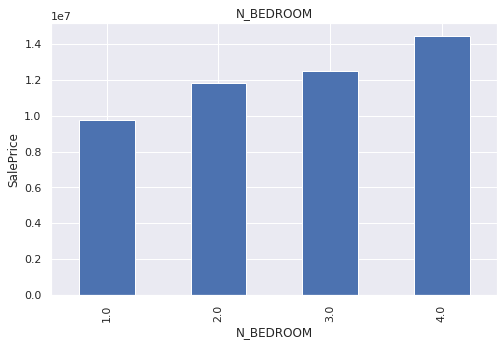

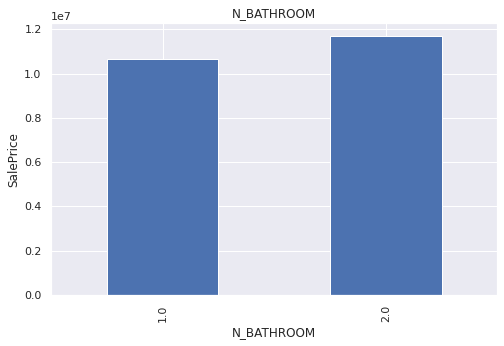

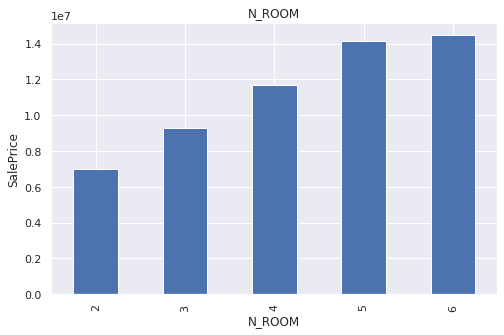

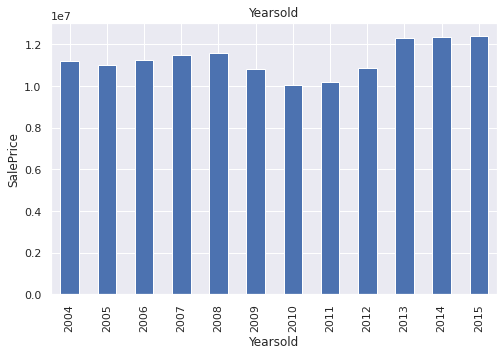

In [50]:
for feature in discrete_feature:
    df1.groupby(feature)['SALES_PRICE'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**OBSERVATION:**
1.There is a linear relationship between N_BEDROOM verus sales price ==> N_BEDROOM is important a feature.
2.There is a linear relationship between N_BATHROOM verus sales price ==> N_BATHROOM is important a feature.
3.There is a linear(approx) relationship between N_ROOM verus sales price ==> N_ROOM is important(considering) a feature.
4.there is no linear relationship between Yearsold versus SalesPrice ==> Yearsold is considered as not an important feature for target.

**continuous_feature vs salesprice histogram plot for identify frequencies**

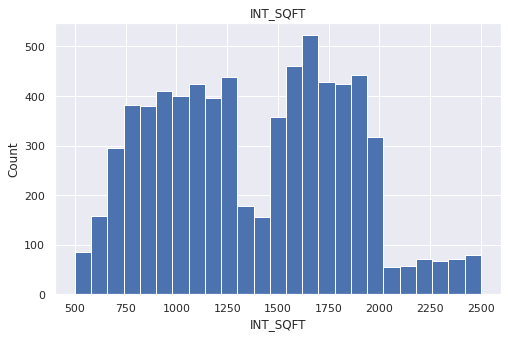

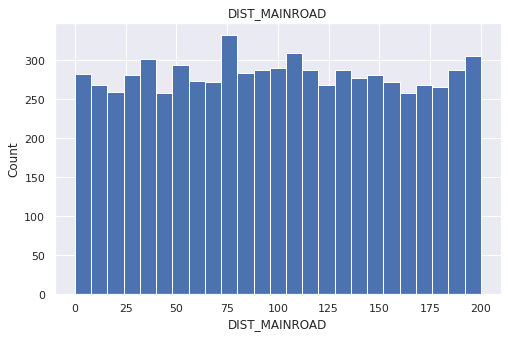

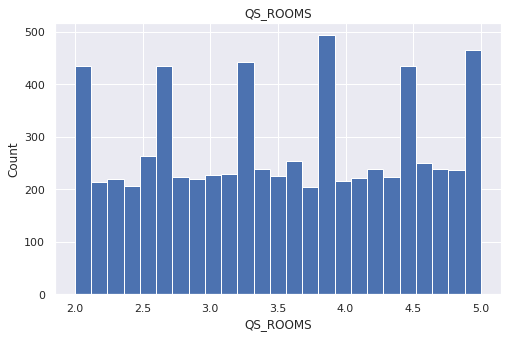

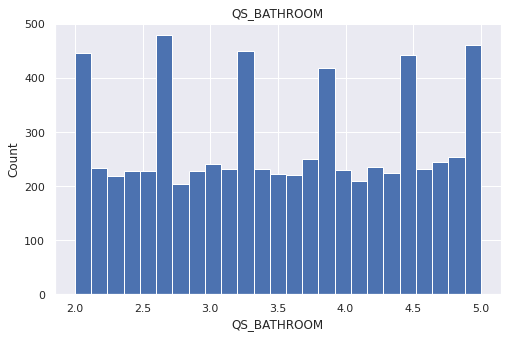

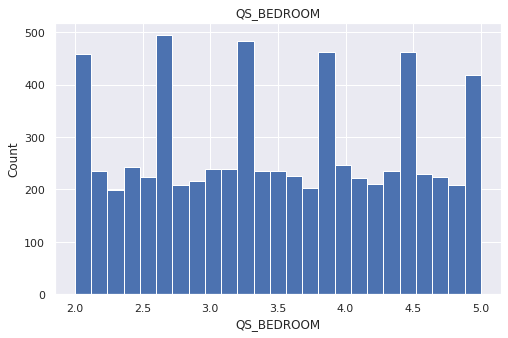

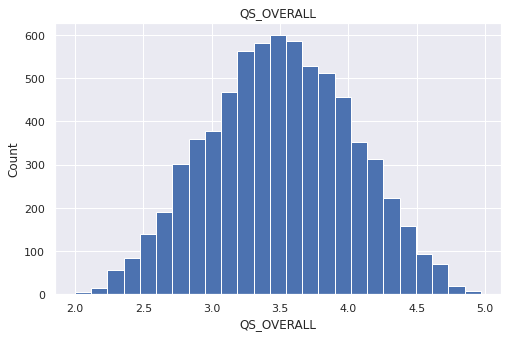

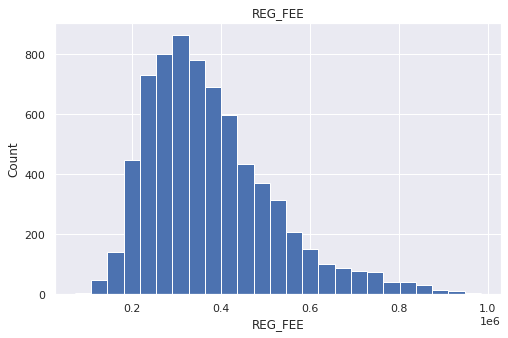

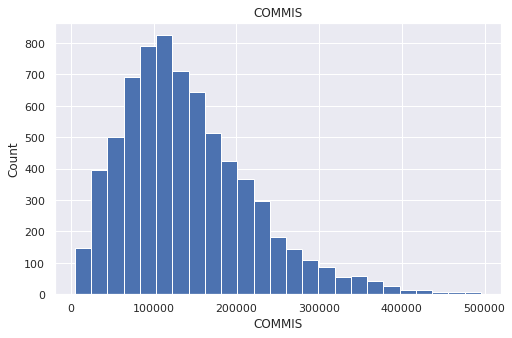

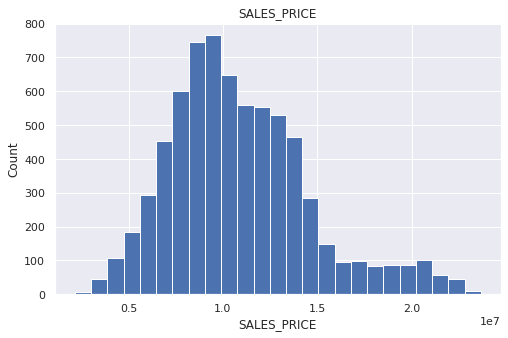

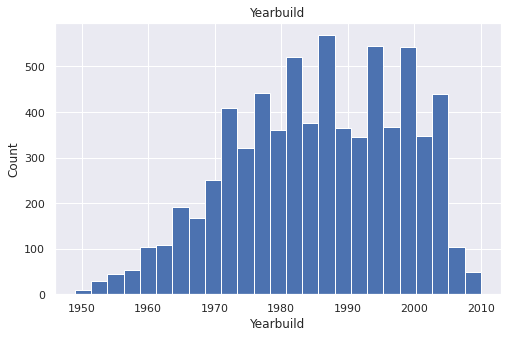

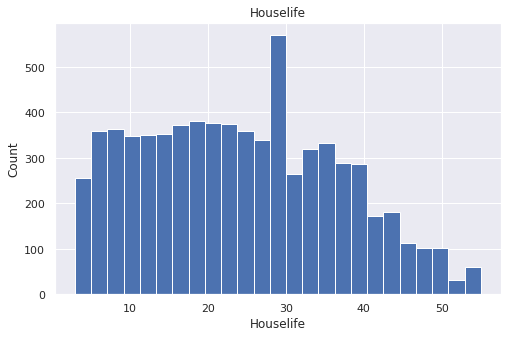

In [51]:
for feature in continuous_feature:
    df1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**OBSERVATION:**
1. The data distribution of INT_SQFT feature is approximately normally distributed.
2. The data distribution of Dist_Mainroad, QS_Rooms,QS_Bathrooms,QS_BedRoom, Yearbuild and Houselife features are not normally distributed.
3.The data distribution of QS_overall and SalesPrice features are normally distributed.
4.The data distribution of Reg_Fee and Comission features are normally distributed but right skewed.

**continuous_feature vs salesprice Scatter plot for find linear relationship**

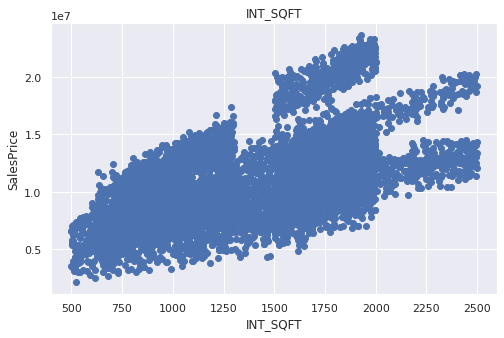

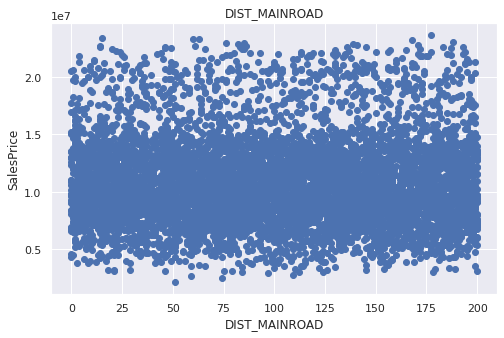

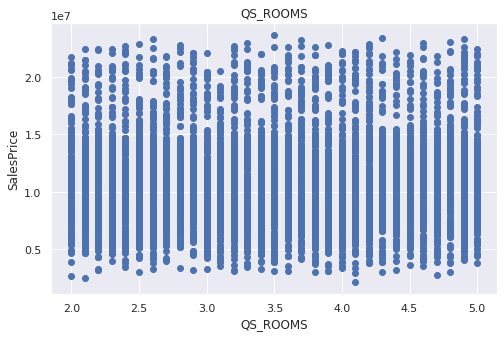

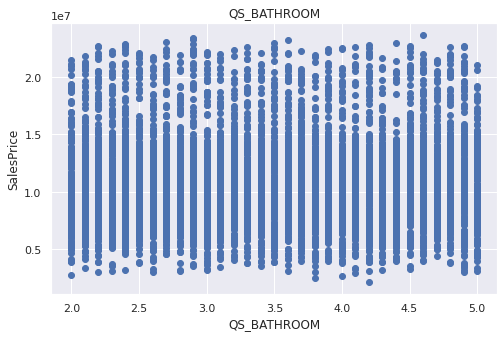

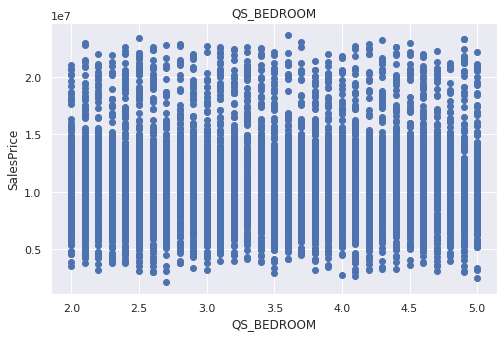

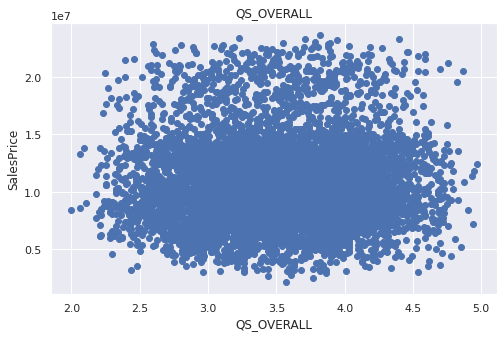

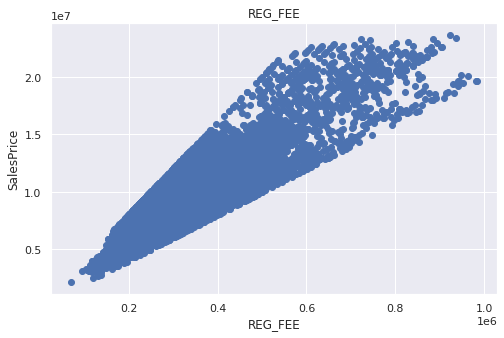

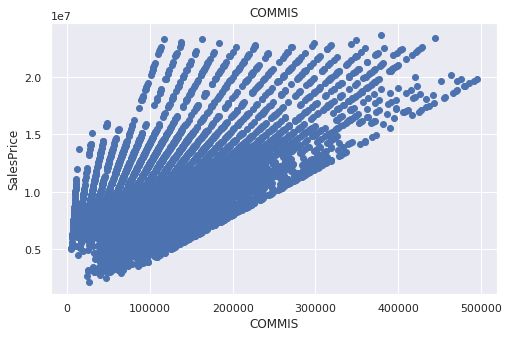

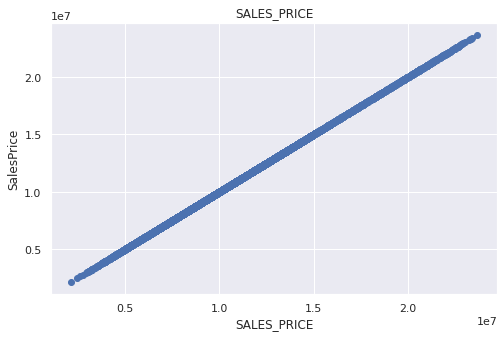

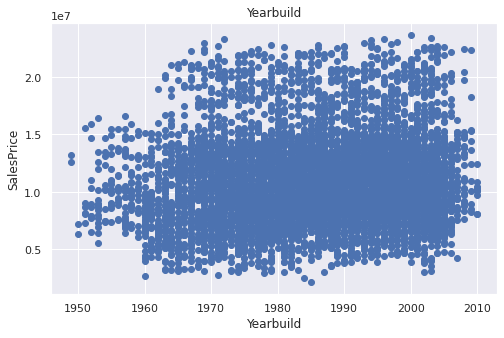

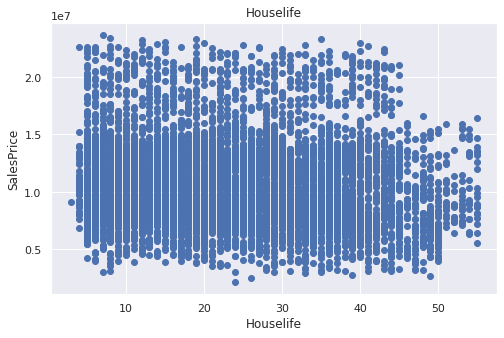

In [52]:
for feature in continuous_feature:
        plt.scatter(df1[feature],df1['SALES_PRICE'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

**Calculating the sales price per Square feet:**

In [53]:
Price_per_sqft=(df1['SALES_PRICE']/df1['INT_SQFT']).astype(int)
Price_per_sqft

0        7569
1       10935
2       14476
3        5191
4        6040
        ...  
7104     8951
7105     5702
7106     5174
7107    10809
7108     5261
Length: 7056, dtype: int64

**continuous_feature vs Price_per_sqft Scatter plot:** 

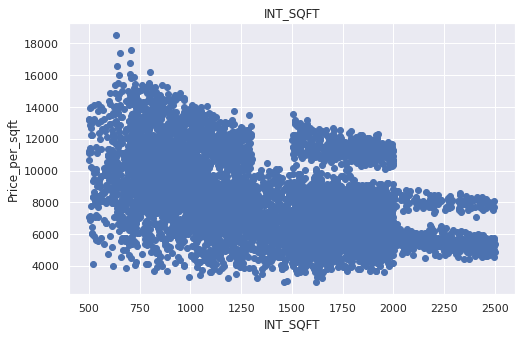

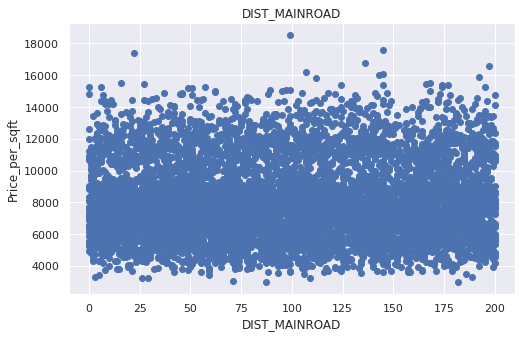

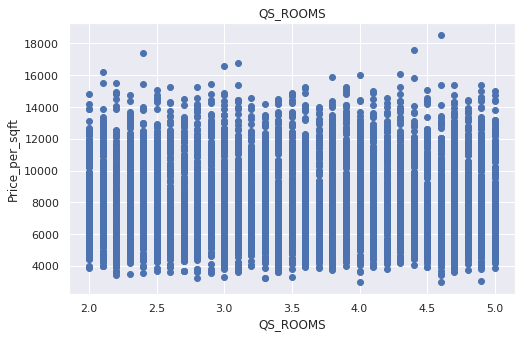

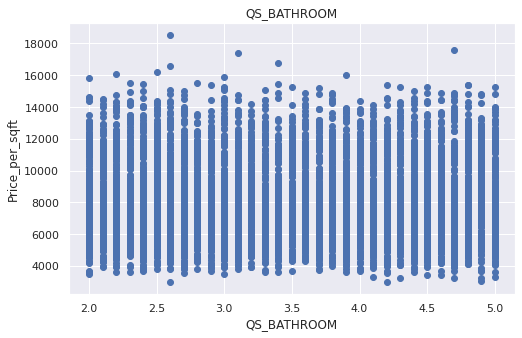

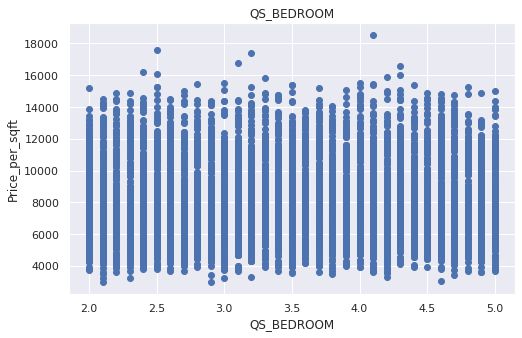

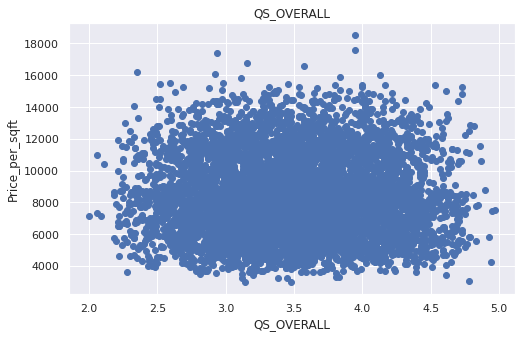

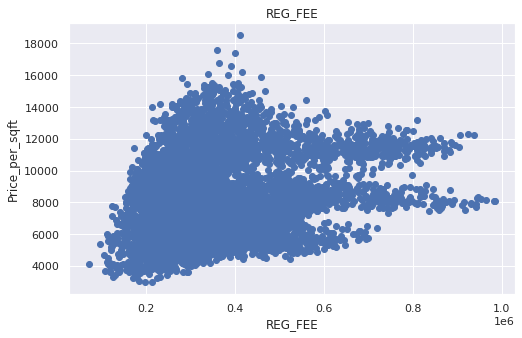

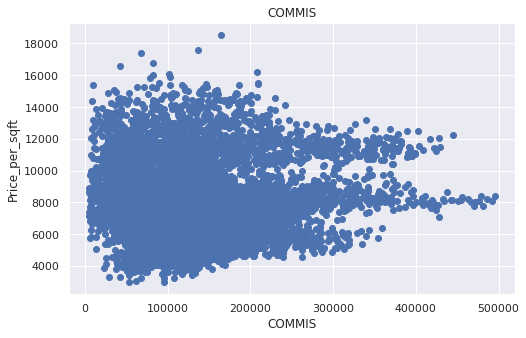

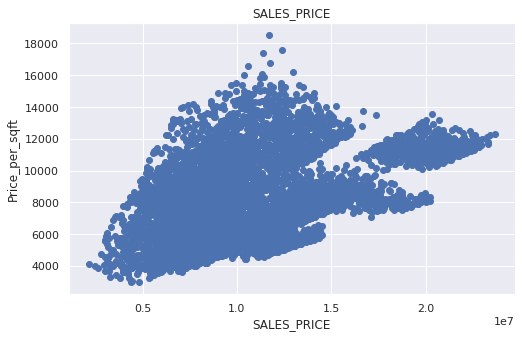

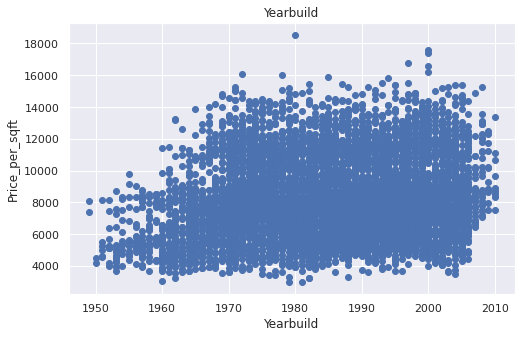

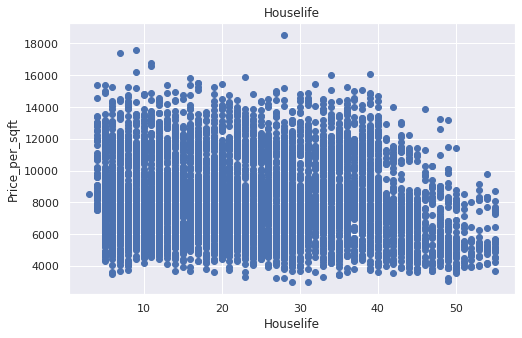

In [54]:
for feature in continuous_feature:
        plt.scatter(df1[feature],Price_per_sqft)
        plt.xlabel(feature)
        plt.ylabel('Price_per_sqft')
        plt.title(feature)
        plt.show()

**Relationship between lifetime of house and sales price**

Text(0.5, 1.0, 'House life vs salesprice')

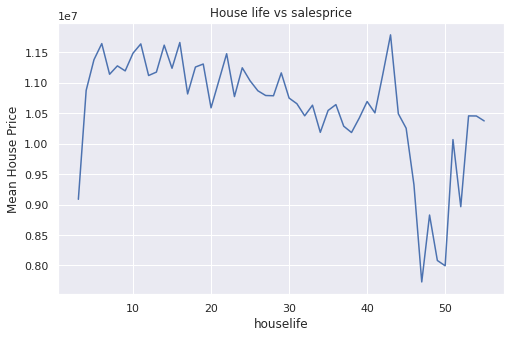

In [55]:
df1.groupby('Houselife')['SALES_PRICE'].mean().plot()
plt.xlabel('houselife')
plt.ylabel('Mean House Price')
plt.title("House life vs salesprice")

**Relationship between Year of the house sold and sales price:**

Text(0.5, 1.0, 'House Price vs YearSold')

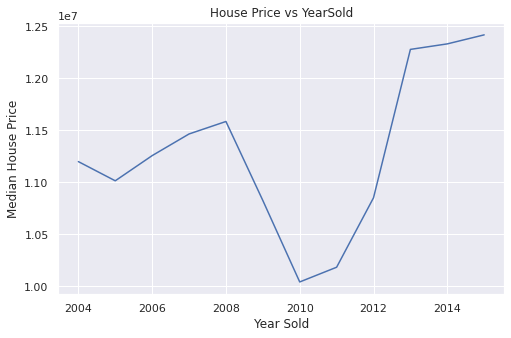

In [56]:
df1.groupby('Yearsold')['SALES_PRICE'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [57]:
df2=df1.copy()

In [58]:
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Yearsold,Yearbuild,Houselife
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWa,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


**Dropping the Columns which are not affecting the Sales Price(Target):**

In [59]:
df2=df2.drop(columns=["REG_FEE","COMMIS",'QS_ROOMS','QS_BEDROOM','QS_OVERALL','QS_BATHROOM',"Yearsold"])

**Seperating categorical and numerical variable for Encoding purpose:**

In [60]:
cat=df2[['AREA','UTILITY_AVAIL','PARK_FACIL','BUILDTYPE','STREET','SALE_COND','MZZONE']]
cat

,AREA,UTILITY_AVAIL,PARK_FACIL,BUILDTYPE,STREET,SALE_COND,MZZONE
0,Karapakkam,AllPub,Yes,Commercial,Paved,AbNormal,A
1,Anna Nagar,AllPub,No,Commercial,Gravel,AbNormal,RH
2,Adyar,ELO,Yes,Commercial,Gravel,AbNormal,RL
3,Velachery,NoSeWa,No,Others,Paved,Family,I
4,Karapakkam,AllPub,Yes,Others,Gravel,AbNormal,C
...,...,...,...,...,...,...,...
7104,Karapakkam,ELO,No,Others,No Access,AdjLand,RM
7105,Velachery,NoSeWa,Yes,Others,No Access,Family,RH
7106,Velachery,NoSeWa,No,House,Gravel,Normal Sale,I
7107,Karapakkam,ELO,Yes,Commercial,Paved,Partial,RL


In [61]:
num=df2[["INT_SQFT","SALES_PRICE","Yearbuild","Houselife","N_BEDROOM","N_ROOM","N_BATHROOM","DIST_MAINROAD"]]
num

,INT_SQFT,SALES_PRICE,Yearbuild,Houselife,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1004,7600000,1967,44,1.0,3,1.0,131
1,1986,21717770,1995,11,2.0,5,1.0,26
2,909,13159200,1992,20,1.0,3,1.0,70
3,1855,9630290,1988,22,3.0,5,2.0,14
4,1226,7406250,1979,30,1.0,3,1.0,84
...,...,...,...,...,...,...,...,...
7104,598,5353000,1962,49,1.0,2,1.0,51
7105,1897,10818480,1995,9,3.0,5,2.0,52
7106,1614,8351410,1978,28,2.0,4,1.0,152
7107,787,8507000,1977,32,1.0,2,1.0,40


**ENCODING:**

**Label Encoding for categorical variables:**

In [62]:
cat1=df2[['AREA','UTILITY_AVAIL','PARK_FACIL','STREET','SALE_COND','MZZONE']]
cat1['AREA'] = cat1['AREA'].replace(["Karapakkam","Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"],[1,2,3,4,5,6,7])
cat1['PARK_FACIL'] = cat1['PARK_FACIL'].replace(["Yes","No"],[1,0])
cat1['UTILITY_AVAIL'] = cat1['UTILITY_AVAIL'].replace(["ELO","NoSeWa","AllPub"],[1,2,3])
cat1['STREET'] = cat1['STREET'].replace(["No Access","Paved","Gravel"],[1,2,3])
cat1['SALE_COND'] = cat1['SALE_COND'].replace(["Partial","Family","AbNormal","Normal Sale","AdjLand"],[1,2,3,4,5])
cat1['MZZONE'] = cat1['MZZONE'].replace(["A","C","I","RH","RL","RM"],[1,2,3,4,5,6])
cat1

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE
0,1,3,1,2,3,1
1,6,3,0,3,3,4
2,2,1,1,3,3,5
3,4,2,0,2,2,3
4,1,3,1,3,3,2
...,...,...,...,...,...,...
7104,1,1,0,1,5,6
7105,4,2,1,1,2,4
7106,4,2,0,3,4,3
7107,1,1,1,2,1,5


In [63]:
one_hot_encoded = pd.get_dummies(cat['BUILDTYPE'])
one_hot_encoded

,Commercial,House,Others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
7104,0,0,1
7105,0,0,1
7106,0,1,0
7107,1,0,0


**merging the encoded categorical variables with numerical variables:**

In [64]:
x=pd.merge(cat1,one_hot_encoded,left_index = True,right_index = True)
x

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE,Commercial,House,Others
0,1,3,1,2,3,1,1,0,0
1,6,3,0,3,3,4,1,0,0
2,2,1,1,3,3,5,1,0,0
3,4,2,0,2,2,3,0,0,1
4,1,3,1,3,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...
7104,1,1,0,1,5,6,0,0,1
7105,4,2,1,1,2,4,0,0,1
7106,4,2,0,3,4,3,0,1,0
7107,1,1,1,2,1,5,1,0,0


In [65]:
X=pd.merge(x,num,left_index=True,right_index=True)
X.head()


,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE,Commercial,House,Others,INT_SQFT,SALES_PRICE,Yearbuild,Houselife,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1,3,1,2,3,1,1,0,0,1004,7600000,1967,44,1.0,3,1.0,131
1,6,3,0,3,3,4,1,0,0,1986,21717770,1995,11,2.0,5,1.0,26
2,2,1,1,3,3,5,1,0,0,909,13159200,1992,20,1.0,3,1.0,70
3,4,2,0,2,2,3,0,0,1,1855,9630290,1988,22,3.0,5,2.0,14
4,1,3,1,3,3,2,0,0,1,1226,7406250,1979,30,1.0,3,1.0,84


In [66]:
X.shape

(7056, 17)

**Defining Independent and Dependent features:**

In [67]:
Y=X['SALES_PRICE']## Dependent variable (target)
Y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7056, dtype: int64

In [68]:
X=X.drop(columns='SALES_PRICE') ## Independent variables
X

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE,Commercial,House,Others,INT_SQFT,Yearbuild,Houselife,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1,3,1,2,3,1,1,0,0,1004,1967,44,1.0,3,1.0,131
1,6,3,0,3,3,4,1,0,0,1986,1995,11,2.0,5,1.0,26
2,2,1,1,3,3,5,1,0,0,909,1992,20,1.0,3,1.0,70
3,4,2,0,2,2,3,0,0,1,1855,1988,22,3.0,5,2.0,14
4,1,3,1,3,3,2,0,0,1,1226,1979,30,1.0,3,1.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,1,0,1,5,6,0,0,1,598,1962,49,1.0,2,1.0,51
7105,4,2,1,1,2,4,0,0,1,1897,1995,9,3.0,5,2.0,52
7106,4,2,0,3,4,3,0,1,0,1614,1978,28,2.0,4,1.0,152
7107,1,1,1,2,1,5,1,0,0,787,1977,32,1.0,2,1.0,40


**SPLITTING AND SCALING of Data:**

**splitting data to training and testing dataset.**

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.20,random_state = 0)
print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (5644, 16)
xtest shape :  (1412, 16)
ytrain shape :  (5644,)
ytest shape :  (1412,)


**Standardization of data for scaling**

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

**Model Fitting:**

**Linear Regression:**

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)
Y_pred1 = regressor.predict(X_test)

In [73]:
coefficients_linear = pd.DataFrame(regressor.coef_,X.columns)
coefficients_linear.columns = ['coefficients_linear']
coefficients_linear

,coefficients_linear
AREA,1.052551e+06
UTILITY_AVAIL,5.144010e+04
PARK_FACIL,5.089399e+05
STREET,3.907508e+05
SALE_COND,2.259104e+05
MZZONE,8.790701e+05
Commercial,1.359149e+06
House,-8.426695e+05
Others,-5.039242e+05
INT_SQFT,7.033200e+05


In [74]:
data1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred1})
data1

,Actual,Predicted
2695,7910000,1.048535e+07
3038,13308950,1.293299e+07
2958,8460450,8.785914e+06
904,9478500,9.465675e+06
3130,8558785,8.808940e+06
...,...,...
1361,9038260,8.429921e+06
4032,10802190,1.230752e+07
4971,4204000,4.097464e+06
3353,12078690,1.138934e+07


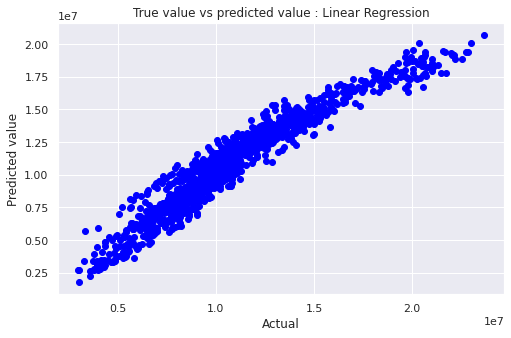

In [75]:
plt.scatter(Y_test, Y_pred1, c = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

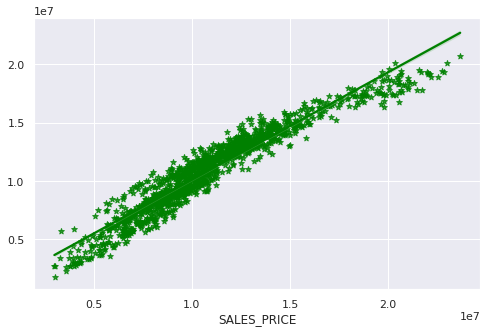

In [76]:
sns.regplot(x=Y_test,y=Y_pred1,marker='*',color='green')

**Observation:**
 The relationship between Actual and Predicted SalesPrice (Target) values is linear 

**Linear Regression Model Evaluation:**

In [77]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred1))

R2- SCORE: 0.9205267125582928


**Random Forest model fitting:**

[0.9854082518653421,
 0.9871637696598266,
 0.9873670129866515,
 0.9878976425392197,
 0.9878981204275613,
 0.9879952377837153,
 0.9876248576537344,
 0.9878753112485724,
 0.9881383098639522,
 0.987917950403681,
 0.988106900504638,
 0.9880491230311261,
 0.9882460051217349,
 0.9882462200266534,
 0.987996481538992,
 0.988242715205713,
 0.9882316396118976,
 0.9881414216611517,
 0.9882844565754908]

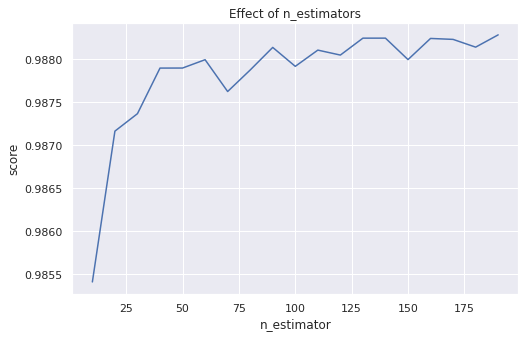

In [78]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
scores

In [79]:
modelrf = RandomForestRegressor()
modelrf.fit(X_train, Y_train)

RandomForestRegressor()

In [80]:
c=modelrf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(Y_test,c))

R2- SCORE: 0.9879426382085774


**Decision Tree:**

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
modeldt = DecisionTreeRegressor()

modeldt.fit(X_train,Y_train)
b = modeldt.predict(X_test)

In [82]:
print('R2- SCORE:', metrics.r2_score(Y_test,b))

R2- SCORE: 0.9702233487667103


**XGBOOST Model:**

In [83]:
from xgboost import XGBRegressor
Xgb=XGBRegressor()
Xgb.fit(X_train,Y_train)
pred=Xgb.predict(X_test)
print('R2- SCORE:', metrics.r2_score(Y_test,pred))

[02:19:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2- SCORE: 0.9890094458920416


**SGDRegressor:**

In [84]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(X_train,Y_train)
pred=sgdr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(Y_test,pred))

R2- SCORE: 0.9198402639733329


**KNN model fitting:**

In [85]:
from sklearn.neighbors import KNeighborsRegressor
modelknn = KNeighborsRegressor()
modelknn.fit(X_train, Y_train)
k= modelknn.predict(X_test)

In [86]:
print('R2- SCORE:', metrics.r2_score(Y_test,k))

R2- SCORE: 0.9335915557100388


**Summary:**
By fitting the data thorough above Machine learning models, XGBOOST regression gives the best 'R^2' value  with a value of 0.98, among other models.

<<<--------------------------------------------------------------->>>

**Cross Valued Score:**

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor,X_train,Y_train,scoring='r2',cv=3)

array([0.92504106, 0.92348612, 0.92197188])

**Finding the range of SalesPrice based on Std(interval):**

In [88]:
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)


LinearRegression()

**Standard Deviation:**

In [89]:
s=np.std(Y_train)
interval=1.96*s

In [90]:
b0,b1=lr_model.coef_,lr_model.intercept_
reg=X_train*b0 + b1
to_pred=X_test[0]
lr_predicted=lr_model.predict([to_pred])
lower,upper=lr_predicted-interval,lr_predicted+interval
print(f'Predicted output range between:{lower} and {upper}')


Predicted output range between:[3065835.90325232] and [17904869.92391048]


**Finding the linear equation (linear regression model):**

In [91]:
x1=num.drop(columns=['SALES_PRICE'])
y1=df2['SALES_PRICE']
x1

,INT_SQFT,Yearbuild,Houselife,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1004,1967,44,1.0,3,1.0,131
1,1986,1995,11,2.0,5,1.0,26
2,909,1992,20,1.0,3,1.0,70
3,1855,1988,22,3.0,5,2.0,14
4,1226,1979,30,1.0,3,1.0,84
...,...,...,...,...,...,...,...
7104,598,1962,49,1.0,2,1.0,51
7105,1897,1995,9,3.0,5,2.0,52
7106,1614,1978,28,2.0,4,1.0,152
7107,787,1977,32,1.0,2,1.0,40


In [92]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [93]:
predictions=model.predict(x1)
predictions

array([ 8977617.27064875, 15942346.4902997 ,  9516106.07219377, ...,
       11729103.99961509,  5907936.6398364 , 11202919.4707762 ])

In [94]:
actuals=y1.values
actuals

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [95]:
for i in range(0,len(predictions)):
  prediction=predictions[i]
  actual=actuals[i]
  print(prediction,"-",actual)
  if i==10:
    break

8977617.270648748 - 7600000
15942346.490299702 - 21717770
9516106.072193772 - 13159200
11880791.73494944 - 9630290
9952865.196434543 - 7406250
11601107.587984413 - 12394750
9841652.919531912 - 8488790
12287736.215418503 - 16800250
5992979.002651736 - 8308970
12157958.120896816 - 8083650
10531536.826789573 - 14938000


In [96]:
mae=0
for i in range(0,len(predictions)):
  prediction=predictions[i]
  actual=actuals[i]
  abs_error=abs(prediction-actual)
  mae=mae+abs_error
mae=mae/len(predictions)
print('mae:',mae)
print('mean:',actuals.mean())
print("mae mean ratio:",100*mae/actuals.mean(),"%")

mae: 2168292.0245035933
mean: 10888008.216411564
mae mean ratio: 19.91449658565938 %


**Linear Equation:**

In [97]:
#y=b0+b1*x1+b2*x2+b3*x3............................+bn*xn+E
#where,b0 is intercept
        #b1,b2,b2....... are coefficients of features.
        #E is the Error

In [98]:
intercept=model.intercept_
intercept

-66120764.8468914

In [99]:
coefficients=model.coef_
coefficients

array([ 2.74190637e+03,  3.43053742e+04,  1.79652736e+01, -2.04884786e+06,
        2.73065251e+06, -1.40212143e+06,  9.54643957e+02])

In [100]:
print("y=",intercept,"+",end="")
for i in range(0,len(coefficients)):
  print(coefficients[i],"*",i,"+",end="")
print("E")


y= -66120764.8468914 +2741.906374624574 * 0 +34305.37420430663 * 1 +17.965273581663496 * 2 +-2048847.86067882 * 3 +2730652.506146643 * 4 +-1402121.4306849274 * 5 +954.6439574975229 * 6 +E


In [101]:
features=pd.DataFrame(coefficients,x1.columns,columns=["coefficient"])
features.coefficent=features.coefficient.abs()
features

,coefficient
INT_SQFT,2.741906e+03
Yearbuild,3.430537e+04
Houselife,1.796527e+01
N_BEDROOM,-2.048848e+06
N_ROOM,2.730653e+06
N_BATHROOM,-1.402121e+06
DIST_MAINROAD,9.546440e+02


**observation:**
1.By calculating the coefficients of features,Yearbuild feature in case numerical data and AREA feature in case of categorical data have more values comparatively.
2.But the units of numerical data are not unique, to decide the most important features,first should convert all features(numerical) into single type unit.
based on that data we should decide the important features.

In [102]:
stdevs=[]
for i in x1.columns:
  stdev=x1[i].std()
  print(i,"->",stdev)
  stdevs

INT_SQFT -> 457.860850097972
Yearbuild -> 12.649534138620444
Houselife -> 12.331564511388677
N_BEDROOM -> 0.8036325265477996
N_ROOM -> 1.0200111447230307
N_BATHROOM -> 0.4095631284921184
DIST_MAINROAD -> 57.40386997109882


In [103]:
import numpy as np
features["std"]=np.array(stdev)
features["importance"]=features["std"]*features["coefficient"]
features["importance_normalized"]=100*features["importance"]/features["importance"].max()
features

,coefficient,std,importance,importance_normalized
INT_SQFT,2.741906e+03,57.40387,1.573960e+05,0.100412
Yearbuild,3.430537e+04,57.40387,1.969261e+06,1.256307
Houselife,1.796527e+01,57.40387,1.031276e+03,0.000658
N_BEDROOM,-2.048848e+06,57.40387,-1.176118e+08,-75.031439
N_ROOM,2.730653e+06,57.40387,1.567500e+08,100.000000
N_BATHROOM,-1.402121e+06,57.40387,-8.048720e+07,-51.347487
DIST_MAINROAD,9.546440e+02,57.40387,5.480026e+04,0.034960


**Summary:**
Among all the independent features 'AREA' plays a major role in predicting  the SalesPrice of a House and the next important one Distance from main road followed by Number of Rooms.